<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [230]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [231]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [232]:
data = pd.read_csv('./train.csv')
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [233]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [234]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [235]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [236]:
data[data['TotalSpent'] == ' ']

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


In [237]:
data['TotalSpent'] = data['TotalSpent'].replace(' ', np.nan)
data = data.dropna()
data['TotalSpent'] = data['TotalSpent'].astype(float)

In [238]:
data[data['TotalSpent'] == ' ']

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn


In [239]:
data[data['TotalSpent'].isna()]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn


In [240]:
data.shape

(5273, 20)

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

### Численные признаки

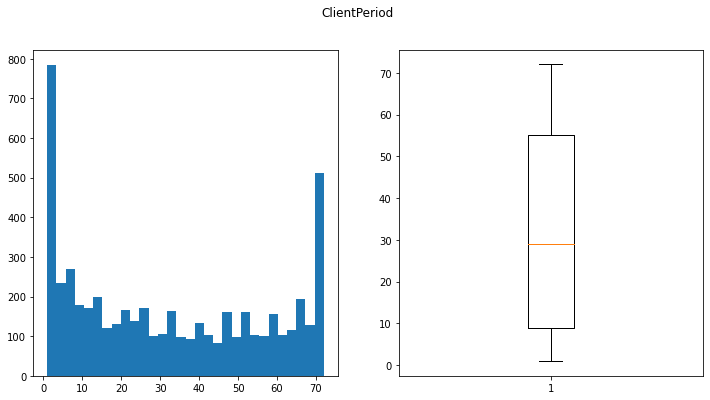

In [241]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('ClientPeriod')

ax1.hist(data['ClientPeriod'], bins=30)

ax2.boxplot(data['ClientPeriod'])
None

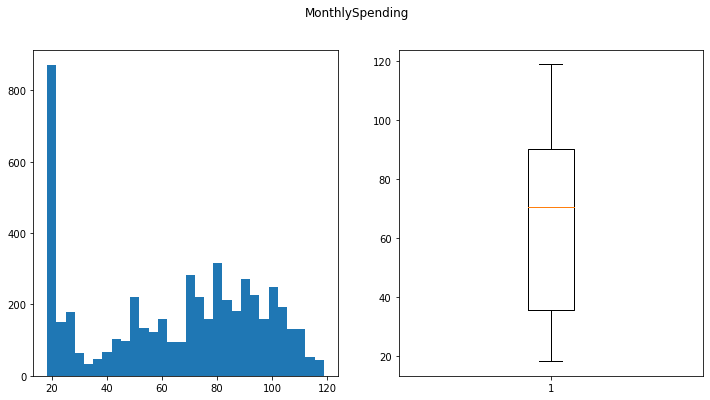

In [242]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('MonthlySpending')

ax1.hist(data['MonthlySpending'], bins=30)

ax2.boxplot(data['MonthlySpending'])
None

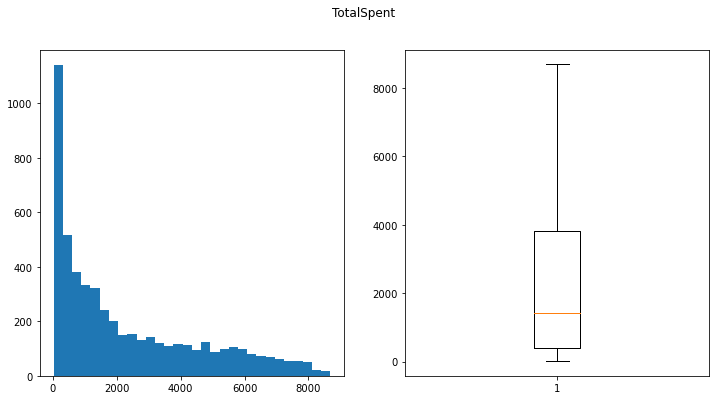

In [243]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('TotalSpent')

ax1.hist(data['TotalSpent'], bins=30)

ax2.boxplot(data['TotalSpent'])
None

### Категориальные признаки

In [244]:
cat_cols

['Sex',
 'IsSeniorCitizen',
 'HasPartner',
 'HasChild',
 'HasPhoneService',
 'HasMultiplePhoneNumbers',
 'HasInternetService',
 'HasOnlineSecurityService',
 'HasOnlineBackup',
 'HasDeviceProtection',
 'HasTechSupportAccess',
 'HasOnlineTV',
 'HasMovieSubscription',
 'HasContractPhone',
 'IsBillingPaperless',
 'PaymentMethod']

In [245]:
for col in cat_cols:
    print('\033[1m' + col)
    print('\033[0m', data[col].value_counts(), '\n')

Sex
 Male      2651
Female    2622
Name: Sex, dtype: int64 

IsSeniorCitizen
 0    4431
1     842
Name: IsSeniorCitizen, dtype: int64 

HasPartner
 No     2704
Yes    2569
Name: HasPartner, dtype: int64 

HasChild
 No     3676
Yes    1597
Name: HasChild, dtype: int64 

HasPhoneService
 Yes    4754
No      519
Name: HasPhoneService, dtype: int64 

HasMultiplePhoneNumbers
 No                  2508
Yes                 2246
No phone service     519
Name: HasMultiplePhoneNumbers, dtype: int64 

HasInternetService
 Fiber optic    2341
DSL            1795
No             1137
Name: HasInternetService, dtype: int64 

HasOnlineSecurityService
 No                     2611
Yes                    1525
No internet service    1137
Name: HasOnlineSecurityService, dtype: int64 

HasOnlineBackup
 No                     2331
Yes                    1805
No internet service    1137
Name: HasOnlineBackup, dtype: int64 

HasDeviceProtection
 No                     2316
Yes                    1820
No internet

<ipython-input-246-6dcc74562499>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


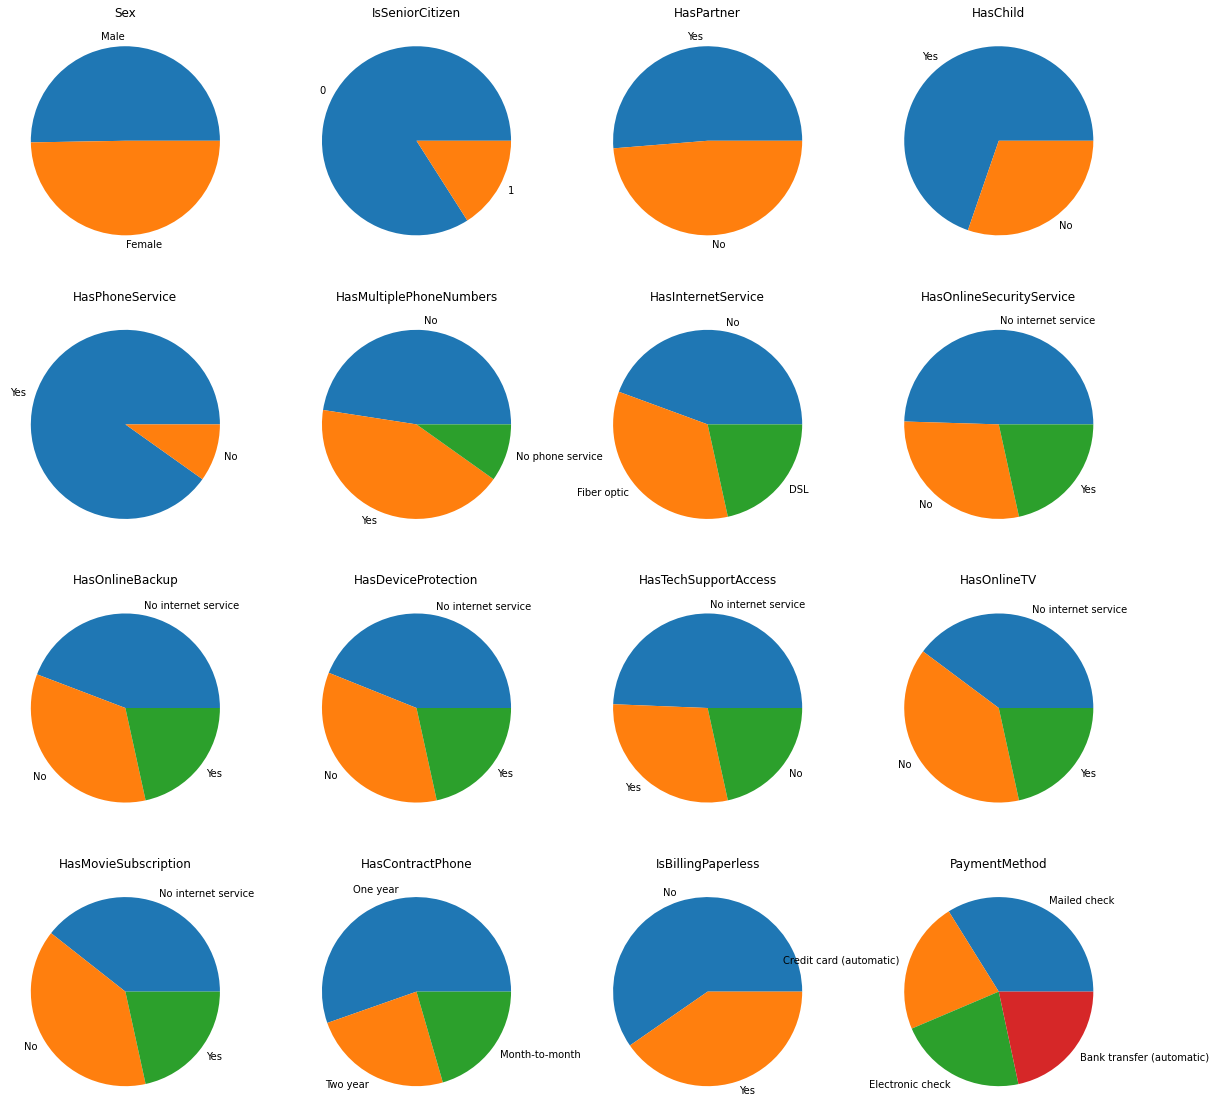

In [246]:

fig, ax = plt.subplots(4, 4, figsize=(20,20))

ax = ax.ravel()

for i, name in enumerate(cat_cols):
    x = data[name].value_counts()
    labels = data[name].unique()
    ax[i].set_title(name)
    ax[i].pie(x, labels=labels)
fig.show()

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [247]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [248]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, f1_score

In [249]:
dummy_features = pd.get_dummies(data[cat_cols])
numeric_data = data[num_cols]
dummy_features.shape, numeric_data.shape

((5273, 42), (5273, 3))

In [250]:
X = pd.concat([numeric_data, dummy_features], axis=1)
X_origin = data.iloc[:, :-1]
X.shape

(5273, 45)

In [251]:
data.shape

(5273, 20)

In [252]:
y = data['Churn']
y.shape

(5273,)

In [253]:
#num_train, num_test, y_train, y_test, dum_train, dum_test = train_test_split(numeric_data, y,
                                                                            #dummy_features, 
                                                                            #train_size=0.8,
                                                                            #random_state=42)

In [254]:
#scaler = StandardScaler()
#num_train_scaled = scaler.fit_transform(num_train)
#num_test_scaled = scaler.transform(num_test)

In [255]:
#X_train = np.concatenate((num_train_scaled, dum_train.values), axis=None)
#X_test = np.concatenate((num_test_scaled, dum_test.values), axis=None)
#X_train = X_train.reshape(-1,45)
#X_test = X_test.reshape(-1,45)

In [284]:
cls = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)
cls = cls.fit(X, y)
preds_train = cls.predict(X)
accuracy_score(preds_train, y), f1_score(preds_train, y, average='macro')

(0.8061824388393704, 0.7341323201593882)

In [272]:

log_reg = LogisticRegression(C = 1, random_state = 42)

#log_reg.fit(X_train, y_train)
#preds_train = log_reg.predict(X_train)
#preds_train

In [288]:
cls.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'logisticregression', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'logisticregression__C', 'logisticregression__class_weight', 'logisticregression__dual', 'logisticregression__fit_intercept', 'logisticregression__intercept_scaling', 'logisticregression__l1_ratio', 'logisticregression__max_iter', 'logisticregression__multi_class', 'logisticregression__n_jobs', 'logisticregression__penalty', 'logisticregression__random_state', 'logisticregression__solver', 'logisticregression__tol', 'logisticregression__verbose', 'logisticregression__warm_start'])

In [291]:
parameters = {'logisticregression__C':[100, 10, 1, 0.1, 0.01, 0.001]}
CV_model = GridSearchCV(estimator=cls, 
                        param_grid=parameters,
                        cv=5, 
                        scoring='roc_auc',
                        n_jobs=-1, 
                        verbose=10,
                        refit=True)
CV_model.fit(X, y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:    3.9s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    4.0s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:    4.0s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    4.0s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [100, 10, 1, 0.1, 0.01,
                                                   0.001]},
             scoring='roc_auc', verbose=10)

In [292]:
print(CV_model.best_params_)

{'logisticregression__C': 100}


In [293]:
CV_model.score(X_train, y_train)

0.48043657688463604

In [294]:
X.shape, y.shape

((5273, 45), (5273,))

In [295]:
y_train_predicted = cls.predict_proba(X)[:, 1]
y_test_predicted = CV_model.predict_proba(X)[:, 1]

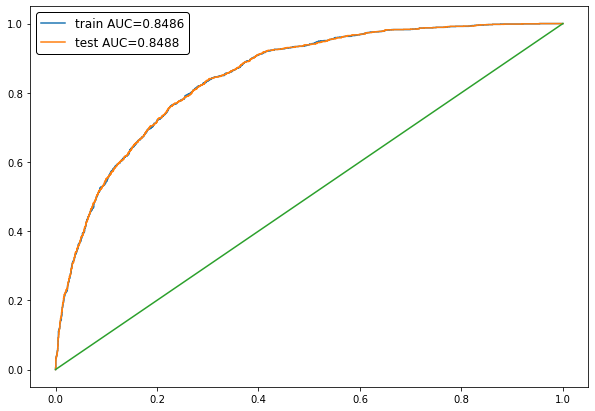

In [296]:
from sklearn.metrics import roc_auc_score, roc_curve

train_auc = roc_auc_score(y, y_train_predicted)
test_auc = roc_auc_score(y, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [300]:
import catboost

In [305]:
X_train, X_valid, y_train, y_valid = train_test_split(X_origin, y, train_size=0.8, random_state=42)

In [344]:
boosting_model = catboost.CatBoostClassifier(n_estimators=170, 
                                             cat_features=cat_cols,
                                             learning_rate = 0.096)

boosting_model.fit(X_train, y_train)

y_train_predicted = boosting_model.predict_proba(X_train)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_valid)[:, 1]

0:	learn: 0.6601222	total: 22.1ms	remaining: 3.73s
1:	learn: 0.6312063	total: 44.2ms	remaining: 3.71s
2:	learn: 0.6063071	total: 64.9ms	remaining: 3.61s
3:	learn: 0.5847039	total: 83.3ms	remaining: 3.46s
4:	learn: 0.5669547	total: 103ms	remaining: 3.41s
5:	learn: 0.5511469	total: 124ms	remaining: 3.4s
6:	learn: 0.5373249	total: 164ms	remaining: 3.81s
7:	learn: 0.5249200	total: 184ms	remaining: 3.73s
8:	learn: 0.5128404	total: 203ms	remaining: 3.63s
9:	learn: 0.5027479	total: 213ms	remaining: 3.41s
10:	learn: 0.4944269	total: 221ms	remaining: 3.2s
11:	learn: 0.4854073	total: 245ms	remaining: 3.23s
12:	learn: 0.4783887	total: 263ms	remaining: 3.18s
13:	learn: 0.4714451	total: 283ms	remaining: 3.16s
14:	learn: 0.4660670	total: 304ms	remaining: 3.14s
15:	learn: 0.4618647	total: 312ms	remaining: 3s
16:	learn: 0.4576148	total: 328ms	remaining: 2.95s
17:	learn: 0.4522586	total: 349ms	remaining: 2.94s
18:	learn: 0.4477402	total: 370ms	remaining: 2.94s
19:	learn: 0.4437821	total: 392ms	remainin

163:	learn: 0.3753562	total: 3.31s	remaining: 121ms
164:	learn: 0.3751592	total: 3.33s	remaining: 101ms
165:	learn: 0.3748429	total: 3.35s	remaining: 80.8ms
166:	learn: 0.3747580	total: 3.37s	remaining: 60.6ms
167:	learn: 0.3744327	total: 3.39s	remaining: 40.4ms
168:	learn: 0.3743720	total: 3.41s	remaining: 20.2ms
169:	learn: 0.3743144	total: 3.43s	remaining: 0us


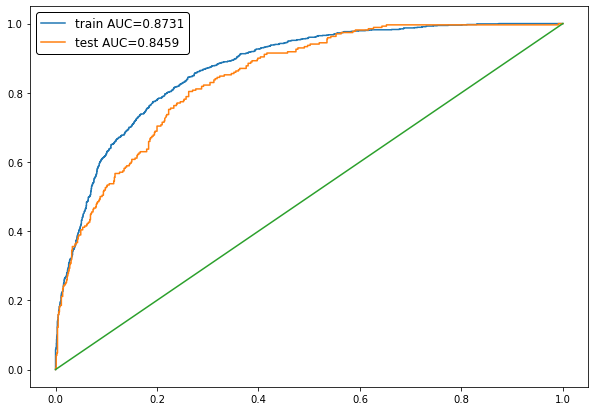

In [345]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [346]:
best_model = boosting_model

In [411]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv', index = False)

In [406]:
best_model.predict_proba(X_test)

array([[0.95511793, 0.04488207],
       [0.24598892, 0.75401108],
       [0.31624886, 0.68375114],
       ...,
       [0.1160141 , 0.8839859 ],
       [0.421944  , 0.578056  ],
       [0.98548551, 0.01451449]])

In [404]:
best_model.predict_proba(X_test)[:,1]

array([0.04488207, 0.75401108, 0.68375114, ..., 0.8839859 , 0.578056  ,
       0.01451449])

In [398]:
best_model.predict(X_test)

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [412]:
submission['Churn']

0       0.044882
1       0.754011
2       0.683751
3       0.013429
4       0.008818
          ...   
1756    0.104618
1757    0.018096
1758    0.883986
1759    0.578056
1760    0.014514
Name: Churn, Length: 1761, dtype: float64

In [409]:
submission['Churn'] = submission['Churn'].replace([np.inf, -np.inf], 0)

In [410]:
submission.to_csv('./my_submission.csv', index = False)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.